In [7]:
import pandas as pd

# Load the dataset
df = pd.read_csv('amazon.csv',encoding='ISO-8859-1')


C:\Users\HP\AppData\Local\Temp\ipykernel_6432\471953187.py:4: DtypeWarning: Columns (21,23) have mixed types. Specify dtype option on import or set low_memory=False.
  df = pd.read_csv('amazon.csv',encoding='ISO-8859-1')


In [8]:
# Inspect the first few rows
print(df.head(5))

# Check the data types of each column
print(df.info())

   index             Order ID       Date                        Status  \
0    0.0  405-8078784-5731545  4/30/2022                     Cancelled   
1    1.0  171-9198151-1101146  4/30/2022  Shipped - Delivered to Buyer   
2    2.0  404-0687676-7273146  4/30/2022                       Shipped   
3    3.0  403-9615377-8133951  4/30/2022                     Cancelled   
4    4.0  407-1069790-7240320  4/30/2022                       Shipped   

  Fulfilment Sales Channel  ship-service-level    Style              SKU  \
0   Merchant      Amazon.in           Standard   SET389   SET389-KR-NP-S   
1   Merchant      Amazon.in           Standard  JNE3781  JNE3781-KR-XXXL   
2     Amazon      Amazon.in          Expedited  JNE3371    JNE3371-KR-XL   
3   Merchant      Amazon.in           Standard    J0341       J0341-DR-L   
4     Amazon      Amazon.in          Expedited  JNE3671  JNE3671-TU-XXXL   

        Category  ... currency  Amount    ship-city   ship-state  \
0            Set  ...      INR

In [21]:
# Summary statistics for numerical variables
print(df[['Qty','Amount']].describe())

                 Qty         Amount
count  128975.000000  128977.000000
mean        0.904431     556.790350
std         0.313354     346.455784
min         0.000000       0.000000
25%         1.000000     376.000000
50%         1.000000     545.000000
75%         1.000000     760.000000
max        15.000000    5584.000000


In [22]:
# Summary statistics for categorical variables
print(df.describe(include='object'))

                   Order ID      Date   Status Fulfilment Sales Channel   \
count                128977    128977   128977     128977         128977   
unique               120379        92       14          4              3   
top     171-5057375-2831560  5/3/2022  Shipped     Amazon      Amazon.in   
freq                     12      2085    77804      89698         128851   

       ship-service-level    Style           SKU Category    Size        ASIN  \
count              128977   128977        128975   128975  128975      128975   
unique                  3     1378          7195        9      11        7190   
top             Expedited  JNE3797  JNE3797-KR-L      Set       M  B09SDXFFQ1   
freq                88615     4224           773    50284   22711         773   

       Courier Status currency  ship-city   ship-state ship-country  \
count          128977   128977     128942       128940       128940   
unique              4        2       8955           69            1   


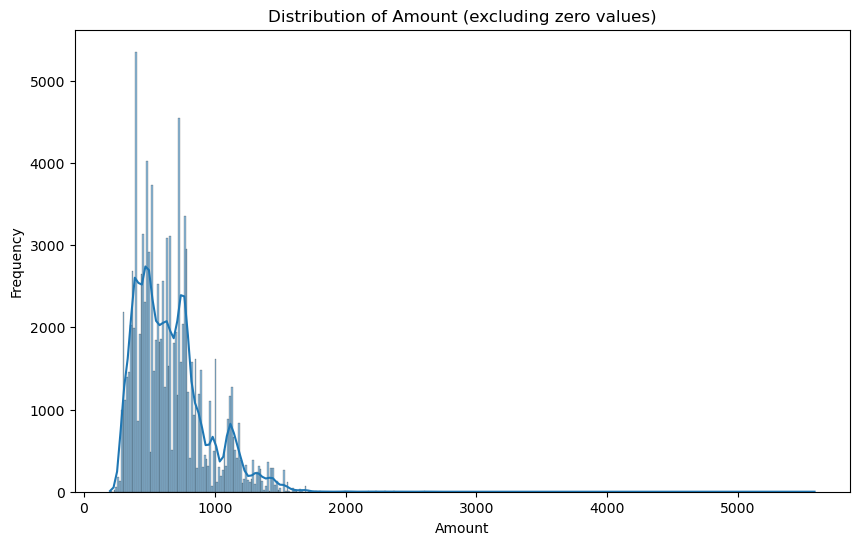

In [24]:
import matplotlib.pyplot as plt
import seaborn as sns

# Filter out rows where 'Amount' is zero
filtered_df = df[df['Amount'] != 0]

# Plot the distribution of 'Amount' without zero values
plt.figure(figsize=(10, 6))
sns.histplot(filtered_df['Amount'], kde=True)
plt.title('Distribution of Amount (excluding zero values)')
plt.xlabel('Amount')
plt.ylabel('Frequency')
plt.show()


In [14]:
# Fill missing values in 'currency' and 'Amount' for non-canceled orders
df.loc[(df['Status'] != 'Cancelled') & (df['currency'].isnull()), 'currency'] = df['currency'].mode()[0]
df.loc[(df['Status'] != 'Cancelled') & (df['Amount'].isnull()), 'Amount'] = df['Amount'].median()

In [15]:
# Fill missing values for 'Courier Status' with 'Unknown'
df['Courier Status'].fillna('Unknown', inplace=True)

C:\Users\HP\AppData\Local\Temp\ipykernel_6432\4257363671.py:2: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, when doing 'df[col].method(value, inplace=True)', try using 'df.method({col: value}, inplace=True)' or df[col] = df[col].method(value) instead, to perform the operation inplace on the original object.


  df['Courier Status'].fillna('Unknown', inplace=True)


In [16]:
# For canceled orders
df.loc[df['Status'] == 'Cancelled', 'currency'] = 'N/A'
df.loc[df['Status'] == 'Cancelled', 'Amount'] = 0

In [17]:
print(df.isnull().sum())

index                     2
Order ID                  0
Date                      0
Status                    0
Fulfilment                0
Sales Channel             0
ship-service-level        0
Style                     0
SKU                       2
Category                  2
Size                      2
ASIN                      2
Courier Status            0
Qty                       2
currency                  0
Amount                    0
ship-city                35
ship-state               37
ship-postal-code         37
ship-country             37
promotion-ids         49157
B2B                       4
fulfilled-by          89702
Unnamed: 22           49054
dtype: int64


In [30]:
# Convert 'Date' column to datetime format, coercing errors
df['Date'] = pd.to_datetime(df['Date'], format='%m/%d/%Y', errors='coerce')

# Check the dtype of 'Date' column 
print(df['Date'].dtype)


datetime64[ns]


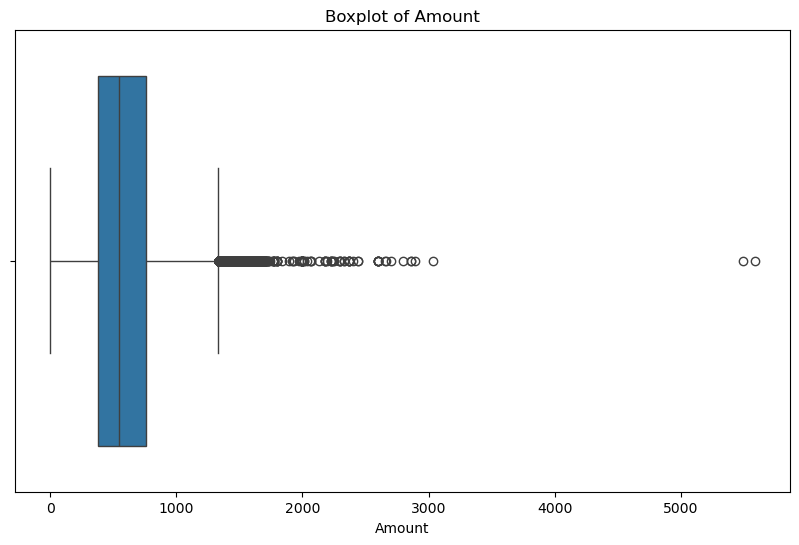

In [31]:
# Visualize outliers in 'Amount'
plt.figure(figsize=(10, 6))
sns.boxplot(x=df['Amount'])
plt.title('Boxplot of Amount')
plt.show()

# Removing outliers beyond the 99th percentile
amount_99th_percentile = df['Amount'].quantile(0.99)
df = df[df['Amount'] <= amount_99th_percentile]


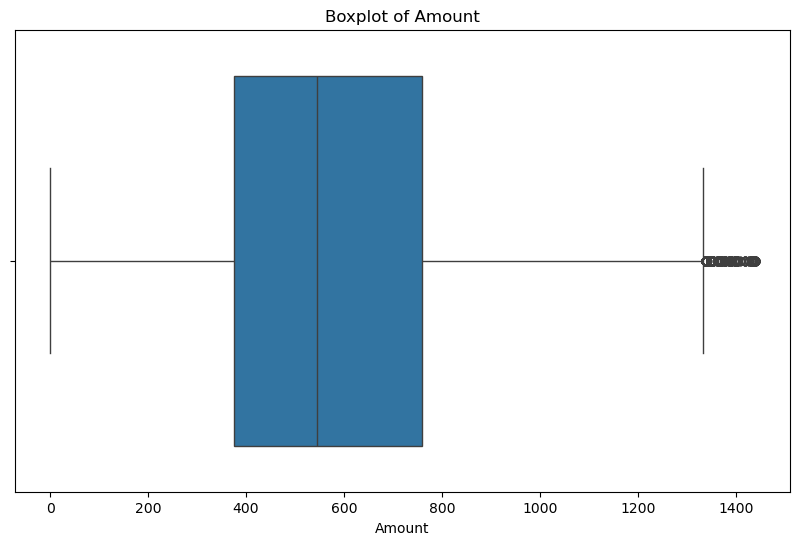

In [32]:
plt.figure(figsize=(10, 6))
sns.boxplot(x=df['Amount'])
plt.title('Boxplot of Amount')
plt.show()

C:\Users\HP\AppData\Local\Temp\ipykernel_6432\3038482746.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df['Month'] = df['Date'].dt.to_period('M')


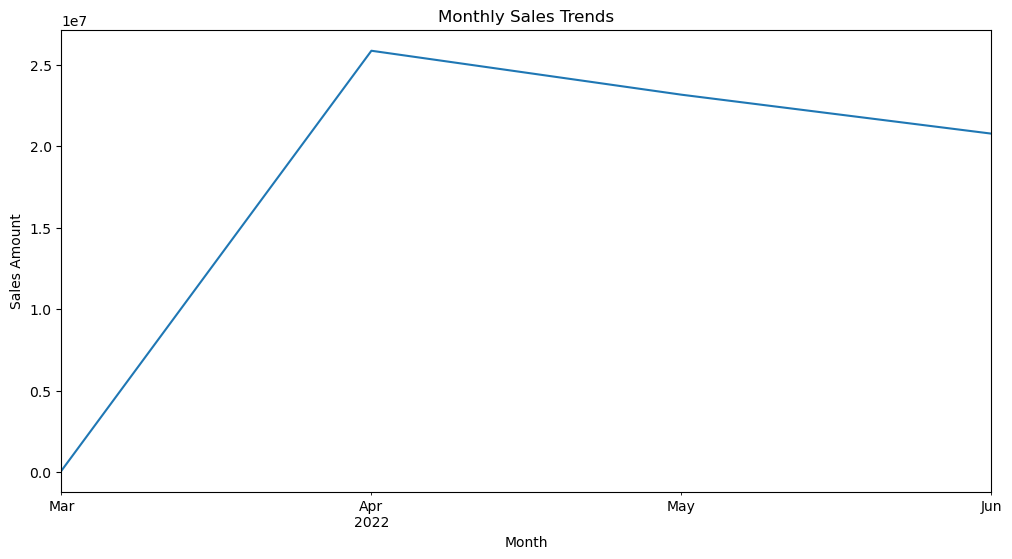

In [33]:
# Monthly sales trends
df['Month'] = df['Date'].dt.to_period('M')

plt.figure(figsize=(12, 6))
monthly_sales = df.groupby('Month')['Amount'].sum()
monthly_sales.plot(kind='line')
plt.title('Monthly Sales Trends')
plt.xlabel('Month')
plt.ylabel('Sales Amount')
plt.show()

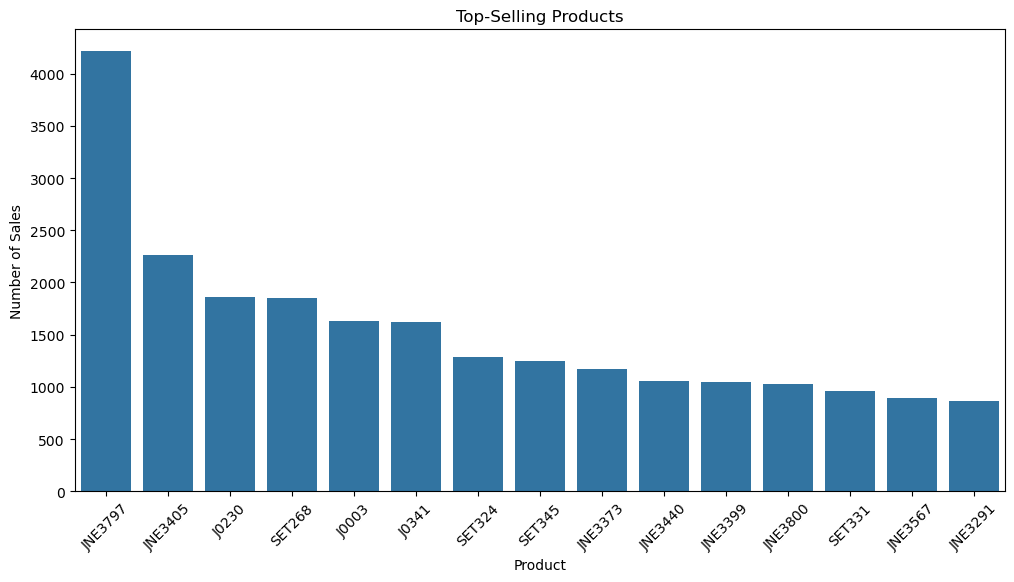

In [41]:
# Top-selling products
plt.figure(figsize=(12, 6))
top_products = df['Style'].value_counts().head(15)
sns.barplot(x=top_products.index, y=top_products.values)
plt.title('Top-Selling Products')
plt.xlabel('Product')
plt.ylabel('Number of Sales')
plt.xticks(rotation=45)
plt.show()

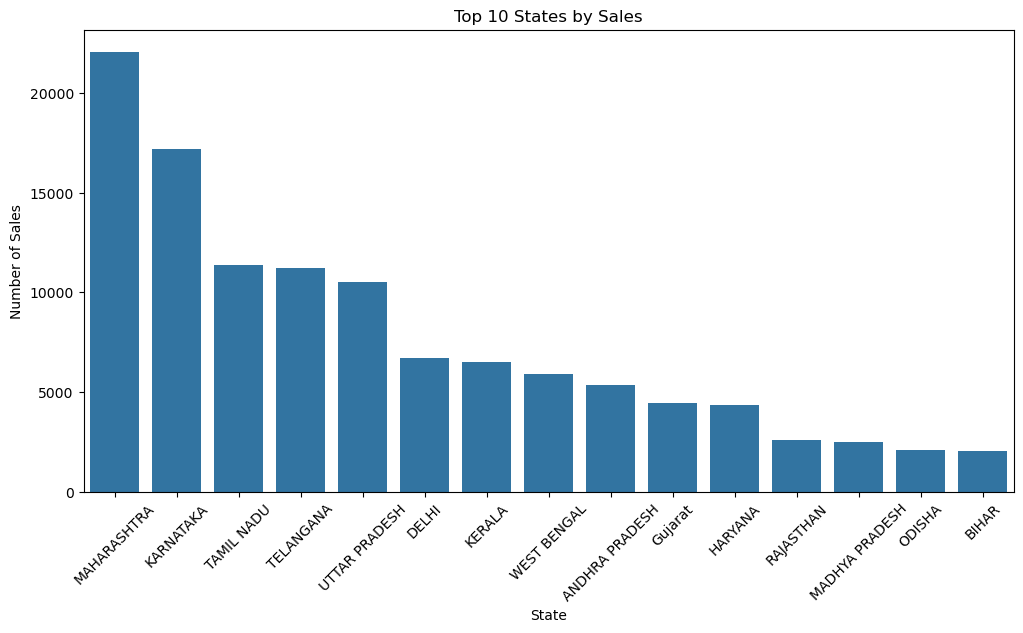

In [40]:

# Regional sales distributions
plt.figure(figsize=(12, 6))
regional_sales = df['ship-state'].value_counts().head(15)
sns.barplot(x=regional_sales.index, y=regional_sales.values)
plt.title('Top 10 States by Sales')
plt.xlabel('State')
plt.ylabel('Number of Sales')
plt.xticks(rotation=45)
plt.show()

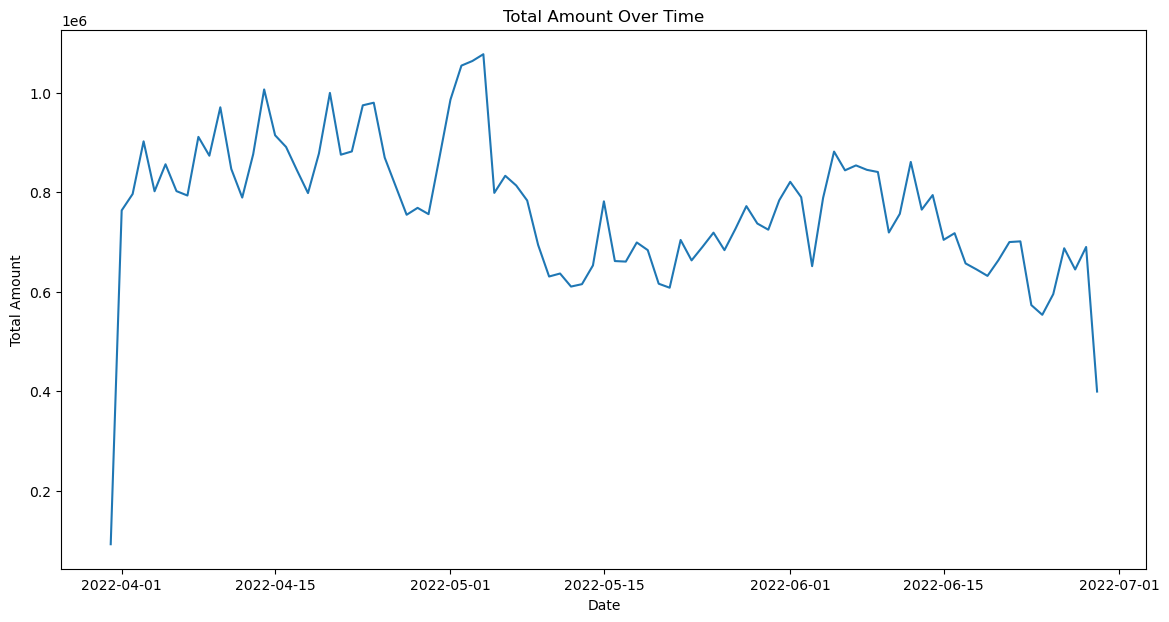

In [36]:
# Group by Date and sum Amount
date_amount = df.groupby('Date')['Amount'].sum().reset_index()

# Plot the Amount over time
plt.figure(figsize=(14, 7))
sns.lineplot(x='Date', y='Amount', data=date_amount)
plt.title('Total Amount Over Time')
plt.xlabel('Date')
plt.ylabel('Total Amount')
plt.show()

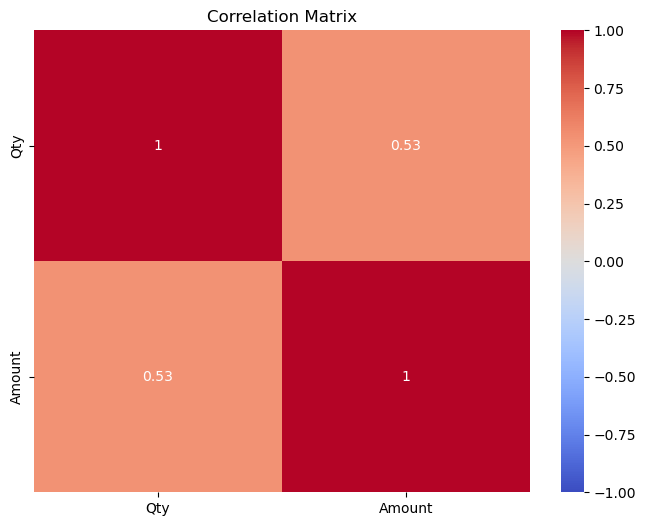

In [37]:
# Compute the correlation matrix
corr_matrix = df[['Qty', 'Amount']].corr()

# Plot the heatmap
plt.figure(figsize=(8, 6))
sns.heatmap(corr_matrix, annot=True, cmap='coolwarm', vmin=-1, vmax=1)
plt.title('Correlation Matrix')
plt.show()

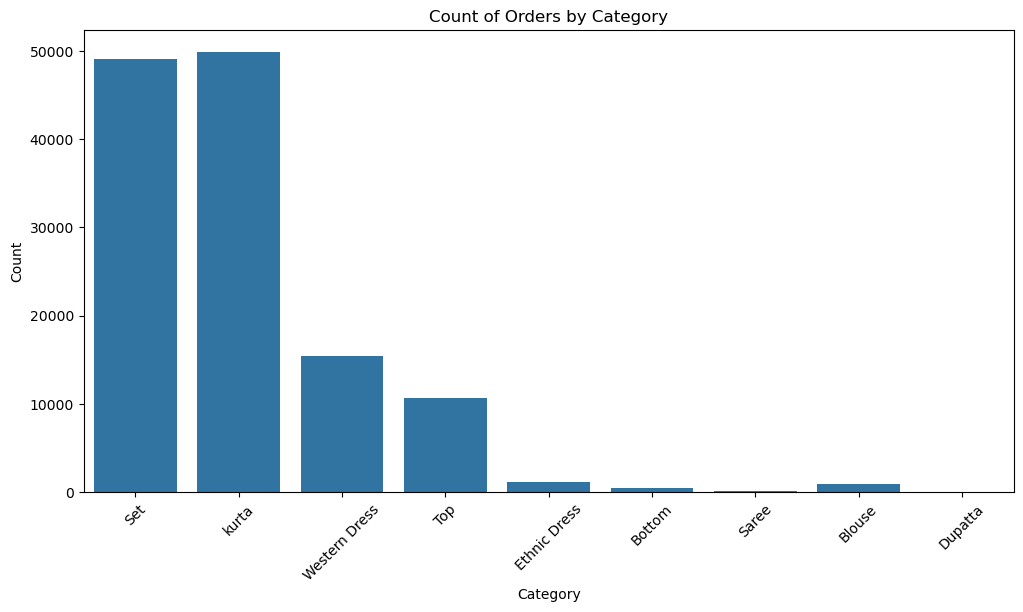

In [38]:
# Count plot for 'Category'
plt.figure(figsize=(12, 6))
sns.countplot(x='Category', data=df)
plt.title('Count of Orders by Category')
plt.xlabel('Category')
plt.ylabel('Count')
plt.xticks(rotation=45)
plt.show()

In [7]:
import warnings
warnings.filterwarnings('ignore')
import pandas as pd
from sklearn.model_selection import StratifiedKFold
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import accuracy_score, precision_score, recall_score
from sklearn.preprocessing import LabelEncoder
import numpy as np

# Load the dataset
df = pd.read_csv('amazon.csv',encoding='ISO-8859-1')

# Data Preprocessing
df['currency'] = df['currency'].fillna('Unknown')
df['Amount'] = df['Amount'].fillna(0)
df['Date'] = pd.to_datetime(df['Date'], errors='coerce')

# Replace 'Shipped - Delivered to Buyer' with 'Shipped'
df['Status'] = df['Status'].replace('Shipped - Delivered to Buyer', 'Shipped')

# Encode categorical features
label_encoders = {}
for column in ['Fulfilment', 'ship-city', 'Category', 'currency', 'Status']:
    le = LabelEncoder()
    df[column] = le.fit_transform(df[column].astype(str))
    label_encoders[column] = le

# Define features and target variable
features = ['Fulfilment', 'ship-city', 'Category', 'Amount', 'currency']
target = 'Status'

X = df[features]
y = df[target]

# Initialize Random Forest model
model = RandomForestClassifier(n_estimators=100, random_state=42)

# Perform k-fold cross-validation with batch processing
kfold = StratifiedKFold(n_splits=5, shuffle=True, random_state=42)
batch_size = 10000

accuracy_scores = []
precision_scores = []
recall_scores = []

for fold, (train_idx, test_idx) in enumerate(kfold.split(X, y)):
    print(f'Processing fold {fold + 1}...')
    
    X_train, X_test = X.iloc[train_idx], X.iloc[test_idx]
    y_train, y_test = y.iloc[train_idx], y.iloc[test_idx]
    
    # Train the model
    model.fit(X_train, y_train)
    
    # Evaluate the model on batches
    total_samples = X_test.shape[0]
    
    for i in range(0, total_samples, batch_size):
        X_batch = X_test.iloc[i:i+batch_size]
        y_batch = y_test.iloc[i:i+batch_size]
        
        # Predict
        y_pred_batch = model.predict(X_batch)
        
        # Calculate metrics for batch
        accuracy = accuracy_score(y_batch, y_pred_batch)
        precision = precision_score(y_batch, y_pred_batch, average='weighted')
        recall = recall_score(y_batch, y_pred_batch, average='weighted')
        
        accuracy_scores.append(accuracy)
        precision_scores.append(precision)
        recall_scores.append(recall)
        
        print(f'Batch {i // batch_size + 1}:')
        print(f'Accuracy: {accuracy:.2f}, Precision: {precision:.2f}, Recall: {recall:.2f}')

# Calculate and print the average metrics across all batches and folds
print(f'\nOverall Performance:')
print(f'Average Accuracy: {np.mean(accuracy_scores):.2f} ± {np.std(accuracy_scores):.2f}')
print(f'Average Precision: {np.mean(precision_scores):.2f} ± {np.std(precision_scores):.2f}')
print(f'Average Recall: {np.mean(recall_scores):.2f} ± {np.std(recall_scores):.2f}')


Processing fold 1...
Batch 1:
Accuracy: 0.90, Precision: 0.89, Recall: 0.90
Batch 2:
Accuracy: 0.87, Precision: 0.84, Recall: 0.87
Batch 3:
Accuracy: 0.90, Precision: 0.90, Recall: 0.90
Processing fold 2...
Batch 1:
Accuracy: 0.90, Precision: 0.89, Recall: 0.90
Batch 2:
Accuracy: 0.87, Precision: 0.84, Recall: 0.87
Batch 3:
Accuracy: 0.89, Precision: 0.89, Recall: 0.89
Processing fold 3...
Batch 1:
Accuracy: 0.90, Precision: 0.89, Recall: 0.90
Batch 2:
Accuracy: 0.87, Precision: 0.84, Recall: 0.87
Batch 3:
Accuracy: 0.89, Precision: 0.88, Recall: 0.89
Processing fold 4...
Batch 1:
Accuracy: 0.90, Precision: 0.90, Recall: 0.90
Batch 2:
Accuracy: 0.87, Precision: 0.84, Recall: 0.87
Batch 3:
Accuracy: 0.89, Precision: 0.88, Recall: 0.89
Processing fold 5...
Batch 1:
Accuracy: 0.90, Precision: 0.89, Recall: 0.90
Batch 2:
Accuracy: 0.87, Precision: 0.84, Recall: 0.87
Batch 3:
Accuracy: 0.89, Precision: 0.88, Recall: 0.89

Overall Performance:
Average Accuracy: 0.89 ± 0.01
Average Precision:

In [8]:
df.head()

,index,Order ID,Date,Status,Fulfilment,Sales Channel,ship-service-level,Style,SKU,Category,...,currency,Amount,ship-city,ship-state,ship-postal-code,ship-country,promotion-ids,B2B,fulfilled-by,Unnamed: 22
0,0.0,405-8078784-5731545,2022-04-30,0,3,Amazon.in,Standard,SET389,SET389-KR-NP-S,5,...,0,647.62,4796,MAHARASHTRA,400081.0,IN,NaN,False,Easy Ship,NaN
1,1.0,171-9198151-1101146,2022-04-30,4,3,Amazon.in,Standard,JNE3781,JNE3781-KR-XXXL,8,...,0,406.00,777,KARNATAKA,560085.0,IN,Amazon PLCC Free-Financing Universal Merchant ...,False,Easy Ship,NaN
2,2.0,404-0687676-7273146,2022-04-30,4,0,Amazon.in,Expedited,JNE3371,JNE3371-KR-XL,8,...,0,329.00,5354,MAHARASHTRA,410210.0,IN,IN Core Free Shipping 2015/04/08 23-48-5-108,True,NaN,NaN
3,3.0,403-9615377-8133951,2022-04-30,0,3,Amazon.in,Standard,J0341,J0341-DR-L,7,...,0,753.33,6141,PUDUCHERRY,605008.0,IN,NaN,False,Easy Ship,NaN
4,4.0,407-1069790-7240320,2022-04-30,4,0,Amazon.in,Expedited,JNE3671,JNE3671-TU-XXXL,6,...,0,574.00,1467,TAMIL NADU,600073.0,IN,NaN,False,NaN,NaN


In [9]:
df.to_csv('amazon_cleaned.csv', index=False)

In [12]:
import dash
import dash_core_components as dcc
import dash_html_components as html
import pandas as pd
import plotly.express as px

# Load the cleaned dataset
df = pd.read_csv('amazon_cleaned.csv')

# Initialize the Dash app
app = dash.Dash(__name__)

# Define the layout of the dashboard

app.layout = html.Div([
    html.H1("Amazon Sales Dashboard", style={'text-align': 'center'}),
    
    html.Div([
        html.H2("Monthly Sales Trends"),
        dcc.Graph(
            figure=px.line(df, x='Date', y='Amount', title='Total Sales Amount Over Time')
        )
    ]),
    
    html.Div([
        html.H2("Top Selling Products"),
        dcc.Graph(
            figure=px.bar(df['Style'].value_counts().head(15), title='Top Selling Products')
        )
    ]),
    
    html.Div([
        html.H2("Regional Sales Distribution"),
        dcc.Graph(
            figure=px.bar(df['ship-state'].value_counts().head(15), title='Top 15 States by Sales')
        )
    ])
])

# Run the app
if __name__ == '__main__':
    app.run_server(debug=True)